**TABLE OF CONTENT**

PART I:
1. IMPORTING FILES AND LIBRARIES
2. TRAIN AND TEST SPLIT
3. LSTM
4. BI-LSTM
5. MLP
6. CNN
7. ANN
8. COMPARISON OF RESULTS

PART II:
1. ENSEMBLING
2. REQUIRMENTS
3. VOTING CLASSIFIER



In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
df = pd.read_csv("/content/drive/MyDrive/A1-fyp2- churn/data for deep models.csv")
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,CLV,AvgMonthlyCharges
4443,1,0,0,0,0.013889,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0.005234,0.287805
608,0,0,1,1,1.000000,1,1,1,1,1,...,0,0,0,1,1,0,0,0,0.964632,0.943896
6310,1,0,0,0,0.833333,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0.311930,0.301572
4299,1,1,0,0,0.402778,1,1,1,1,0,...,0,1,0,0,1,0,0,0,0.198591,0.422756
2771,1,0,1,1,0.180556,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0.096018,0.455803


**Train test split**

In [27]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

In [28]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
X_train.shape

(5634, 28)

In [30]:
X_test.shape

(1409, 28)

In [31]:
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(random_state=42)
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**LSTM**

In [32]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Reshape the input data for LSTM
# LSTM expects input in 3D format: (samples, timesteps, features)

# Reshape the training and testing data for LSTM (1 timestep in this case)
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
lstm_model = Sequential()

# Add a Bidirectional LSTM layer
#model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(64, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))

# Add Dropout to prevent overfitting
lstm_model.add(Dropout(0.3))


# Add a Dense output layer with a sigmoid activation function for binary classification
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")

# Evaluate the model
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"LSTM Accuracy: {accuracy_lstm * 100:.2f}%")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lstm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lstm))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6906 - loss: 0.5892 - val_accuracy: 0.7950 - val_loss: 0.4444
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7861 - loss: 0.4411 - val_accuracy: 0.8039 - val_loss: 0.4226
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7871 - loss: 0.4384 - val_accuracy: 0.8066 - val_loss: 0.4173
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7910 - loss: 0.4444 - val_accuracy: 0.7995 - val_loss: 0.4158
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7970 - loss: 0.4266 - val_accuracy: 0.8092 - val_loss: 0.4129
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7885 - loss: 0.4418 - val_accuracy: 0.8101 - val_loss: 0.4132
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7966 - loss: 0.4241 - val_accuracy: 0.8119 - val_loss: 0.4102
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8031 - loss: 0.4167 - val_accuracy: 0.8092 - val_

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
LSTM ROC-AUC Score: 0.86


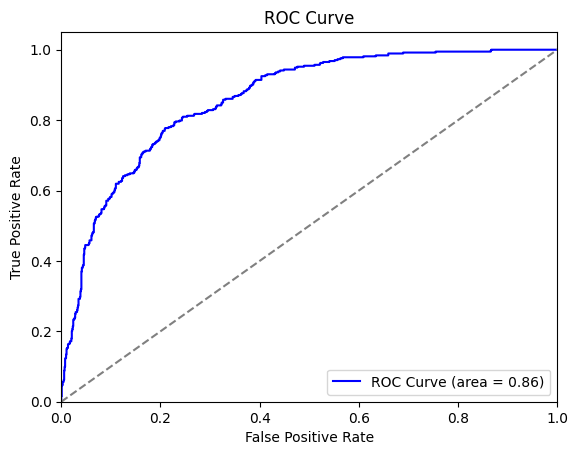

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC-AUC score
y_pred_prob_lstm = lstm_model.predict(X_test_lstm)  # Get predicted probabilities
roc_auc_lstm = roc_auc_score(y_test, y_pred_prob_lstm)
print(f"LSTM ROC-AUC Score: {roc_auc_lstm:.2f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lstm)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [47]:
import joblib

#Save the trained models
joblib.dump(lstm_model, 'lstm_81_model.joblib')

['lstm_81_model.joblib']

/content/lstm_81_model.joblib

----------------------------------------------------------

**BI-LSTM**

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7162 - loss: 0.5659 - val_accuracy: 0.7933 - val_loss: 0.4297
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7968 - loss: 0.4289 - val_accuracy: 0.8030 - val_loss: 0.4194
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7929 - loss: 0.4238 - val_accuracy: 0.8083 - val_loss: 0.4153
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8019 - loss: 0.4145 - val_accuracy: 0.8075 - val_loss: 0.4133
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7978 - loss: 0.4174 - val_accuracy: 0.8075 - val_loss: 0.4121
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7923 - loss: 0.4378 - val_accuracy: 0.8128 - val_loss: 0.4101
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7910 - loss: 0.4185 - val_accuracy: 0.8039 - val_loss: 0.4100
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8094 - loss: 0.4130 - val_accuracy: 0.8119 - val

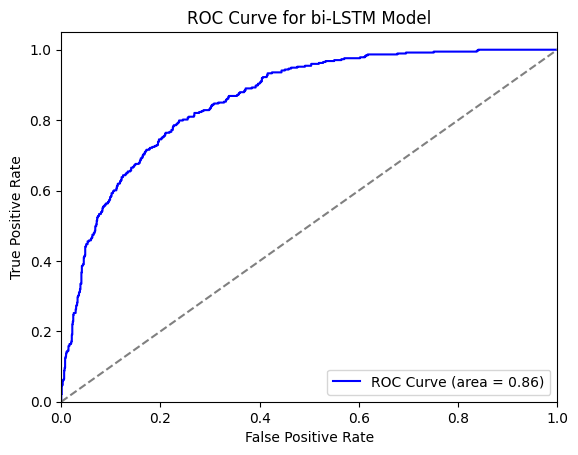

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Reshape the training and testing data for LSTM (1 timestep in this case)
X_train_bilstm = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_bilstm = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the BiLSTM model using a different variable name (bilstm_model)
bilstm_model = Sequential()

# Add a Bidirectional LSTM layer
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(X_train_bilstm.shape[1], X_train_bilstm.shape[2])))

# Add Dropout to prevent overfitting
bilstm_model.add(Dropout(0.3))

# Add a Dense output layer with a sigmoid activation function for binary classification
bilstm_model.add(Dense(1, activation='sigmoid'))

# Compile the BiLSTM model
bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the BiLSTM model
history_bilstm = bilstm_model.fit(X_train_bilstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_prob_bilstm = bilstm_model.predict(X_test_bilstm)  # Get predicted probabilities
y_pred_bilstm = (y_pred_prob_bilstm > 0.5).astype("int32")

# Evaluate the BiLSTM model
accuracy_bilstm = accuracy_score(y_test, y_pred_bilstm)
print(f"bi-LSTM Accuracy: {accuracy_bilstm * 100:.2f}%")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bilstm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bilstm))

# Calculate ROC-AUC score
roc_auc_bilstm = roc_auc_score(y_test, y_pred_prob_bilstm)
print(f"bi-LSTM ROC-AUC Score: {roc_auc_bilstm:.2f}")

# Plot ROC curve
fpr_bilstm, tpr_bilstm, _ = roc_curve(y_test, y_pred_prob_bilstm)
plt.figure()
plt.plot(fpr_bilstm, tpr_bilstm, color='blue', label=f'ROC Curve (area = {roc_auc_bilstm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for bi-LSTM Model')
plt.legend(loc='lower right')
plt.show()




**MLP**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7704 - loss: 0.4753 - val_accuracy: 0.7933 - val_loss: 0.4279
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7854 - loss: 0.4418 - val_accuracy: 0.8057 - val_loss: 0.4115
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7818 - loss: 0.4394 - val_accuracy: 0.8057 - val_loss: 0.4134
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7951 - loss: 0.4238 - val_accuracy: 0.8048 - val_loss: 0.4163
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7948 - loss: 0.4204 - val_accuracy: 0.7977 - val_loss: 0.4155


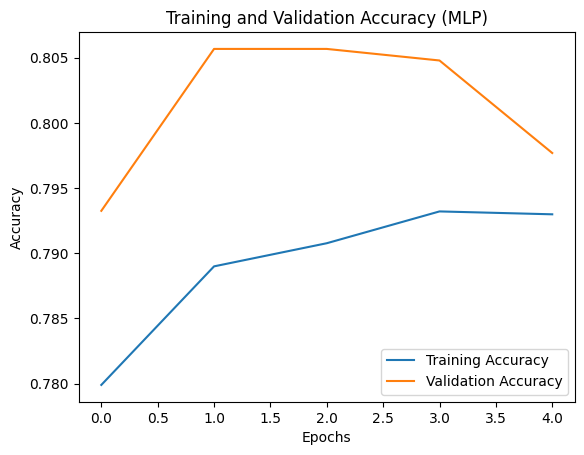

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MLP Accuracy: 81.41%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1036
           1       0.66      0.60      0.63       373

    accuracy                           0.81      1409
   macro avg       0.76      0.75      0.75      1409
weighted avg       0.81      0.81      0.81      1409


Confusion Matrix:
[[922 114]
 [148 225]]
MLP ROC-AUC Score: 0.86


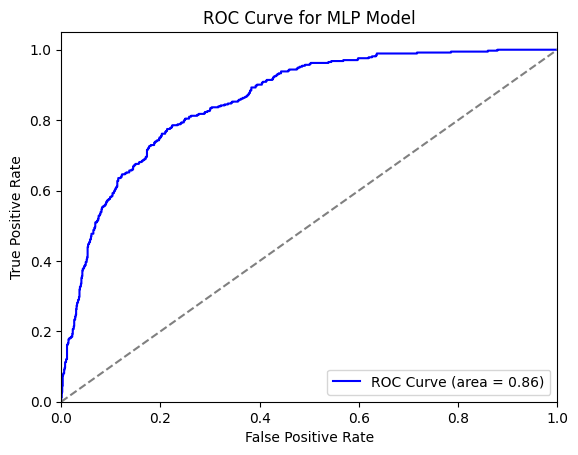

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt



# Define the MLP model
mlp_model = Sequential()

# Input layer with 256 units and 'tanh' activation function
mlp_model.add(Dense(256, activation='tanh', input_shape=(X_train_mlp.shape[1],)))

# Add Dropout to prevent overfitting
mlp_model.add(Dropout(0.3))

# Second hidden layer with 128 units and 'tanh' activation
mlp_model.add(Dense(128, activation='tanh'))

# Add Dropout
mlp_model.add(Dropout(0.3))

# Third hidden layer with 64 units and Leaky ReLU activation
mlp_model.add(Dense(64))
mlp_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))

# Output layer for binary classification with sigmoid activation
mlp_model.add(Dense(1, activation='sigmoid'))

# Compile the MLP model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement EarlyStopping for MLP
early_stopping_mlp = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the MLP model
history_mlp = mlp_model.fit(X_train_mlp, y_train,
                            epochs=50,
                            batch_size=32,
                            validation_split=0.2,
                            callbacks=[early_stopping_mlp],
                            verbose=1)

# Visualize Training History (Accuracy per Epoch)
plt.plot(history_mlp.history['accuracy'], label='Training Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (MLP)')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred_prob_mlp = mlp_model.predict(X_test_mlp)  # Get predicted probabilities
y_pred_mlp = (y_pred_prob_mlp > 0.5).astype("int32")

# Evaluate the MLP model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp * 100:.2f}%")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))

# Calculate ROC-AUC score for MLP
roc_auc_mlp = roc_auc_score(y_test, y_pred_prob_mlp)
print(f"MLP ROC-AUC Score: {roc_auc_mlp:.2f}")

# Plot ROC curve for MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_prob_mlp)
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='blue', label=f'ROC Curve (area = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP Model')
plt.legend(loc='lower right')
plt.show()



**CNN**

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7223 - loss: 0.5332 - val_accuracy: 0.8048 - val_loss: 0.4239
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7926 - loss: 0.4378 - val_accuracy: 0.8128 - val_loss: 0.4133
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7855 - loss: 0.4430 - val_accuracy: 0.8128 - val_loss: 0.4120
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7915 - loss: 0.4325 - val_accuracy: 0.8092 - val_loss: 0.4115
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7959 - loss: 0.4319 - val_accuracy: 0.8048 - val_loss: 0.4115
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8021 - loss: 0.4174 - val_accuracy: 0.8083 - val_loss: 0.4128
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7940 - loss: 0.4308 - val_accuracy: 0.8128 - val_loss: 0.4080
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8022 - loss: 0.4219 - val_accuracy: 0.8066 - va

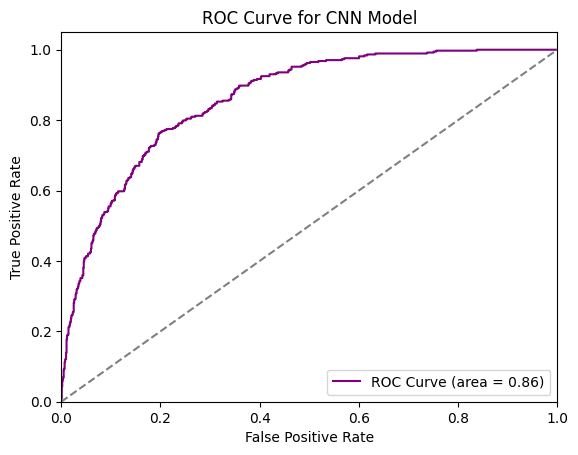

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Reshape the input data for CNN (CNN expects input in 3D format: (samples, timesteps, features))
X_train_cnn = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the CNN model using a different variable name (cnn_model)
cnn_model = Sequential()

# Add a 1D convolutional layer with 64 filters, kernel size 3, and ReLU activation
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))

# Add a max pooling layer
cnn_model.add(MaxPooling1D(pool_size=2))

# Flatten the output before feeding into the dense layers
cnn_model.add(Flatten())

# Add a dropout layer to prevent overfitting
cnn_model.add(Dropout(0.3))

# Add a dense layer with 64 units and ReLU activation
cnn_model.add(Dense(64, activation='relu'))

# Add the output layer with a sigmoid activation for binary classification
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_prob_cnn = cnn_model.predict(X_test_cnn)  # Get predicted probabilities
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype("int32")

# Evaluate the CNN model
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"CNN Accuracy: {accuracy_cnn * 100:.2f}%")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cnn))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_cnn))

# Calculate ROC-AUC score
roc_auc_cnn = roc_auc_score(y_test, y_pred_prob_cnn)
print(f"CNN ROC-AUC Score: {roc_auc_cnn:.2f}")

# Plot ROC curve
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_prob_cnn)
plt.figure()
plt.plot(fpr_cnn, tpr_cnn, color='purple', label=f'ROC Curve (area = {roc_auc_cnn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN Model')
plt.legend(loc='lower right')
plt.show()


**ANN**

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7339 - loss: 0.5266 - val_accuracy: 0.8083 - val_loss: 0.4179
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7823 - loss: 0.4463 - val_accuracy: 0.8083 - val_loss: 0.4162
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7965 - loss: 0.4361 - val_accuracy: 0.8048 - val_loss: 0.4123
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7903 - loss: 0.4354 - val_accuracy: 0.8030 - val_loss: 0.4106
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8082 - loss: 0.4052 - val_accuracy: 0.8083 - val_loss: 0.4098
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7948 - loss: 0.4283 - val_accuracy: 0.8030 - val_loss: 0.4151
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7901 - loss: 0.4274 - val_accuracy: 0.8101 - val_loss: 0.4164
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7994 - loss: 0.4349 - val_accuracy: 0.8066 - val_

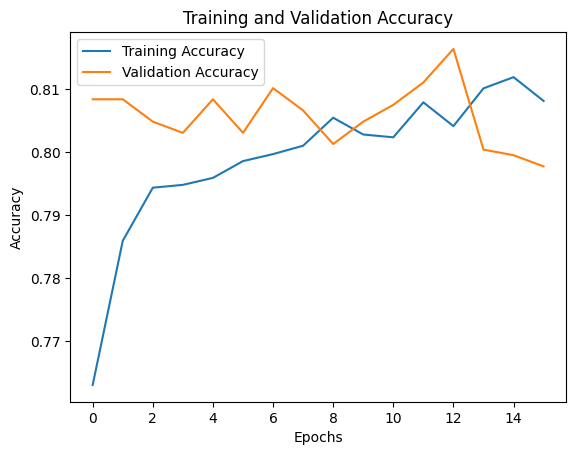

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
ANN Accuracy: 81.26%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[956  80]
 [184 189]]
ANN ROC-AUC Score: 0.86


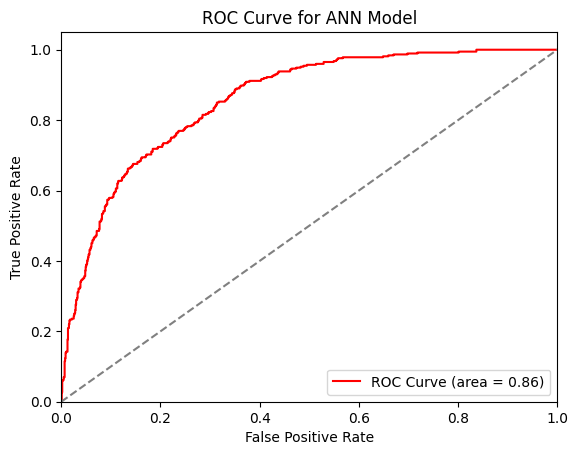

In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# No need to reshape the input for ANN since ANN expects 2D data: (samples, features)
X_train_ann = np.array(X_train)
X_test_ann = np.array(X_test)

# Define the ANN model using a different variable name (ann_model)
ann_model = Sequential()

# Add a Dense input layer (hidden layer 1) with 128 units and ReLU activation
ann_model.add(Dense(128, activation='relu', input_shape=(X_train_ann.shape[1],)))

# Add Dropout to prevent overfitting
ann_model.add(Dropout(0.3))

# Add another Dense hidden layer (hidden layer 2) with 64 units and ReLU activation
ann_model.add(Dense(64, activation='relu'))

# Add the output layer with a sigmoid activation for binary classification
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the ANN model with Early Stopping
history_ann = ann_model.fit(X_train_ann, y_train,
                            epochs=50,  # Set a higher number of epochs
                            batch_size=32,
                            validation_split=0.2,
                            callbacks=[early_stopping],
                            verbose=1)

# Visualize Training History (Accuracy per Epoch)
plt.plot(history_ann.history['accuracy'], label='Training Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred_prob_ann = ann_model.predict(X_test_ann)  # Get predicted probabilities
y_pred_ann = (y_pred_prob_ann > 0.5).astype("int32")

# Evaluate the ANN model
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"ANN Accuracy: {accuracy_ann * 100:.2f}%")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ann))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))

# Calculate ROC-AUC score
roc_auc_ann = roc_auc_score(y_test, y_pred_prob_ann)
print(f"ANN ROC-AUC Score: {roc_auc_ann:.2f}")

# Plot ROC curve
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_pred_prob_ann)
plt.figure()
plt.plot(fpr_ann, tpr_ann, color='red', label=f'ROC Curve (area = {roc_auc_ann:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ANN Model')
plt.legend(loc='lower right')
plt.show()



**COMPARISON OF RESULTS**

In [39]:
# Compare results for all models (LSTM, BiLSTM, CNN, and ANN)

# Store the accuracy scores in a dictionary
accuracy_scores = {
    "LSTM": accuracy_lstm,
    "BiLSTM": accuracy_bilstm,
    "MLP": accuracy_mlp,
    "CNN": accuracy_cnn,
    "ANN": accuracy_ann
}

# Print accuracy comparison
print("Model Accuracy Comparison:")
for model, accuracy in accuracy_scores.items():
    print(f"{model}: {accuracy * 100:.2f}%")






Model Accuracy Comparison:
LSTM: 81.62%
BiLSTM: 81.55%
MLP: 81.41%
CNN: 81.19%
ANN: 81.26%


In [40]:
# Store the ROC-AUC scores in a dictionary
roc_auc_scores = {
    "LSTM": roc_auc_lstm,
    "BiLSTM": roc_auc_bilstm,
    "MLP": roc_auc_mlp,
    "CNN": roc_auc_cnn,
    "ANN": roc_auc_ann
}

# Print ROC-AUC comparison
print("Model ROC-AUC Score Comparison:")
for model, roc_auc in roc_auc_scores.items():
    print(f"{model}: {roc_auc:.2f}")


Model ROC-AUC Score Comparison:
LSTM: 0.86
BiLSTM: 0.86
MLP: 0.86
CNN: 0.86
ANN: 0.86


In [41]:

# Print classification reports for all models
print("\nClassification Reports:")
print("\nLSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))

print("\nBiLSTM Classification Report:")
print(classification_report(y_test, y_pred_bilstm))

print("\nMLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))

print("\nCNN Classification Report:")
print(classification_report(y_test, y_pred_cnn))

print("\nANN Classification Report:")
print(classification_report(y_test, y_pred_ann))

# Print confusion matrices for all models
print("\nConfusion Matrices:")
print("\nLSTM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lstm))

print("\nBiLSTM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bilstm))

print("\nMLP Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))

print("\nCNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_cnn))

print("\nANN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))


Classification Reports:

LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


BiLSTM Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


MLP Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1036
           1       0.66      0.60      0.63       373

    accuracy                           0.81      1409
   macro avg   

**ENSEMBLING**

In [42]:
print(type(lstm_model))  # Should show <class 'tensorflow.python.keras.engine.sequential.Sequential'> or similar
print(type(bilstm_model))
print(type(mlp_model))
print(type(cnn_model))
print(type(ann_model))

<class 'keras.src.models.sequential.Sequential'>
<class 'keras.src.models.sequential.Sequential'>
<class 'keras.src.models.sequential.Sequential'>
<class 'keras.src.models.sequential.Sequential'>
<class 'keras.src.models.sequential.Sequential'>


In [43]:
!pip install tensorflow

In [44]:
!pip install tensorflow scikit-learn

In [45]:
!pip install scikeras

**VOTING CLASSIFIER**

In [46]:
import numpy as np
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score



# Define your model-building functions for each Keras model

def build_ann_model():
    # Your ANN model definition
    model = ann_model  # replace with your actual ANN model creation code
    return model

def build_mlp_model():
    # Your MLP model definition
    model = mlp_model  # replace with your actual MLP model creation code
    return model

def build_bilstm_model():
    # Your BiLSTM model definition
    model = bilstm_model  # replace with your actual BiLSTM model creation code
    return model

def build_lstm_model():
    # Your LSTM model definition
    model = lstm_model  # replace with your actual LSTM model creation code
    return model

def build_cnn_model():
    # Your CNN model definition
    model = cnn_model  # replace with your actual CNN model creation code
    return model

# Wrap Keras models using KerasClassifier to make them scikit-learn compatible
model1 = KerasClassifier(build_fn=build_ann_model, epochs=10, batch_size=32, verbose=0)
model2 = KerasClassifier(build_fn=build_mlp_model, epochs=10, batch_size=32, verbose=0)
model3 = KerasClassifier(build_fn=build_bilstm_model, epochs=10, batch_size=32, verbose=0)
model4 = KerasClassifier(build_fn=build_lstm_model, epochs=10, batch_size=32, verbose=0)
model5 = KerasClassifier(build_fn=build_cnn_model, epochs=10, batch_size=32, verbose=0)


# Create a VotingClassifier with soft voting
voting_clf = VotingClassifier(estimators=[
    ('ann', model1),
    ('mlp', model2),
    ('bilstm', model3),
    ('lstm', model4),
    ('cnn', model5)
], voting='soft')

# For 2D input models (ANN, MLP)
X_train_2d = X_train.values  # shape: (samples, features)
X_test_2d = X_test.values    # shape: (samples, features)

# For 3D input models (LSTM, BiLSTM, CNN)
# Reshape to (samples, timesteps, features). Set timesteps to 1 for CNN/LSTM if not dealing with sequences.
X_train_3d = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))  # shape: (samples, 1, features)
X_test_3d = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))      # shape: (samples, 1, features)



# Modify input shape for CNN specifically
# Reshape X_train_3d to have (samples, timesteps, channels) for CNN
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))  # (samples, features, 1)
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))      # (samples, features, 1)

# Fit and predict for each model separately based on their input requirements
y_pred_prob_voting = []

for name, model in voting_clf.estimators:
    if name in ['ann', 'mlp']:  # Models that expect 2D input
        print(f"Fitting {name} model with 2D input...")
        model.fit(X_train_2d, y_train)
        y_pred_prob_voting.append(model.predict_proba(X_test_2d)[:, 1])  # 2D for prediction
    elif name in ['cnn']:  # CNN expects input as (samples, features, 1)
        print(f"Fitting {name} model with CNN input (3D)...")
        model.fit(X_train_cnn, y_train)
        y_pred_prob_voting.append(model.predict_proba(X_test_cnn)[:, 1])  # CNN 3D for prediction
    else:  # Models that expect 3D input (e.g., LSTM, BiLSTM)
        print(f"Fitting {name} model with 3D input...")
        model.fit(X_train_3d, y_train)
        y_pred_prob_voting.append(model.predict_proba(X_test_3d)[:, 1])  # 3D for prediction

# Average the predictions for soft voting
y_pred_prob_voting = np.mean(y_pred_prob_voting, axis=0)
y_pred_voting = (y_pred_prob_voting > 0.5).astype("int32")

# Evaluate the Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
roc_auc_voting = roc_auc_score(y_test, y_pred_prob_voting)

# Print the evaluation metrics
print(f"Voting Classifier Accuracy: {accuracy_voting * 100:.2f}%")
print(f"Voting Classifier ROC-AUC Score: {roc_auc_voting:.2f}")


Fitting ann model with 2D input...


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Fitting mlp model with 2D input...


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Fitting bilstm model with 3D input...


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Fitting lstm model with 3D input...


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Fitting cnn model with CNN input (3D)...


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Voting Classifier Accuracy: 81.26%
Voting Classifier ROC-AUC Score: 0.86
